In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

In [2]:
redditdf = pd.read_csv('RedditTwitterDS/Reddit_Data.csv', delimiter=',')
redditdf.dataframeName = 'Reddit_Data.csv'
nRow, nCol = redditdf.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 37249 rows and 2 columns


In [3]:
twitterdf = pd.read_csv('RedditTwitterDS/Twitter_Data.csv', delimiter=',')
twitterdf.dataframeName = 'Twitter_Data.csv'
nRow, nCol = twitterdf.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 162980 rows and 2 columns


In [23]:
y=redditdf.category
x=redditdf.clean_comment
#x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
y.shape

(37249,)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk import word_tokenize
from nltk.corpus import stopwords

x_cleaned = []
for line in x:
    line = str(line)
    tokens = nltk.word_tokenize(line)
    tokens_rmPunc = [re.sub(r"[^\w]", "", word) for word in tokens] #remove punctuations
    tokens_cleaned = [word for word in tokens_rmPunc if word != '']
    tokens_rmStop = [word for word in tokens_cleaned if word not in stopwords.words('english')] #remove stopwords
    line_cleaned = " ".join(tokens_rmStop)
    x_cleaned.append(line_cleaned.lower())
x_cleaned

['family mormon never tried explain still stare puzzled time time like kind strange creature nonetheless come admire patience calmness equanimity acceptance compassion developed things buddhism teaches',
 'buddhism much lot compatible christianity especially considering sin suffering almost thing suffering caused wanting things want going getting things wrong way christian would mean wanting things coincide god wanting things coincide without aid jesus buddhism could also seen proof god mighty omnipotence certainly christians lucky one christ side everyone else well many christians believe god grace salvation buddhism god way showing grace upon others would also help study things jesus said see buddha made similar claims rich man getting heaven joke basically advocating rid material possessions fact distinctly remembered jesus making someone cry someone asked achieve salvation jesus replied live like buddhist roughly translated also point buddha rarely spoke anything god theory persona

In [10]:
print(np.shape(x_cleaned))
print(x_cleaned[37248])

(37249,)
facebook working bjp cell


In [11]:
# Vectorize and apply TF-IDF
cv = CountVectorizer(stop_words='english', min_df=3)
training_vectors = cv.fit_transform(x_cleaned)

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(training_vectors)
print('The dimensions of the TF-IDF matrix I got is ',X_tfidf.shape)

The dimensions of the TF-IDF matrix I got is  (37249, 18346)


In [12]:
print(np.unique(y))
print(len(y))
#0 Indicates it is a Neutral Comment
#1 Indicates a Postive Comment 
#-1 Indicates a Negative Comment

[-1  0  1]
37249


### Apply K-means clustering with k = 2 using the TF-IDF data. 

In [13]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

km = KMeans(n_clusters=3, init='k-means++', max_iter=1000, n_init=40, random_state = None)
km.fit(X_tfidf)
Y_pred = km.predict(X_tfidf)
contingency_matrix(y, Y_pred, eps=None, sparse=False)

array([[ 1013,   786,  6478],
       [ 1084,   615, 11443],
       [ 2075,  1357, 12398]])

In [14]:
def plot_contingency_matrix(cm,
                            target_names,
                            title='Contingency Matrix',
                            cmap=None,
                            normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(title + '.png')
    plt.show()

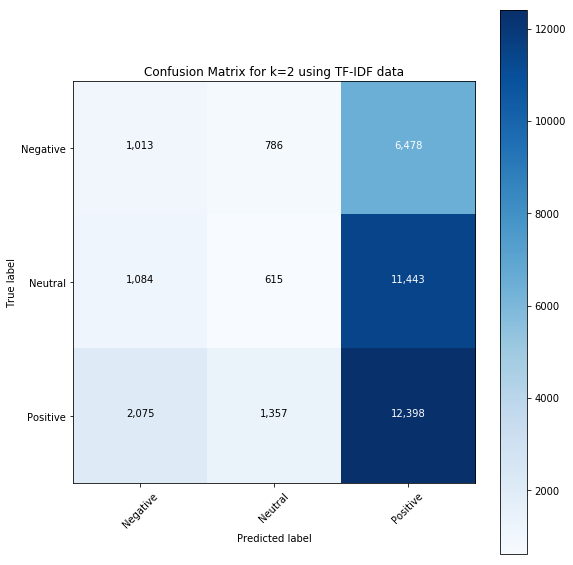

In [16]:
cm = contingency_matrix(y, Y_pred, eps=None, sparse=False)
plot_contingency_matrix(cm = cm,
                       normalize    = False,
                       target_names = ['Negative','Neutral','Positive'],
                       title        = 'Confusion Matrix for '  + 'k=2 using TF-IDF data')

In [17]:
def plot_measures(Y_train, Y_pred):
    hg = metrics.homogeneity_score(Y_train, Y_pred)
    cp = metrics.completeness_score(Y_train, Y_pred)
    vm = metrics.v_measure_score(Y_train, Y_pred)
    ari = metrics.adjusted_rand_score(Y_train, Y_pred)
    ami = metrics.adjusted_mutual_info_score(Y_train, Y_pred)
    print("Homogeneity: {:0.4f}".format(hg))
    print("Completeness: {:0.4f}".format(cp))
    print("V-measure: {:0.4f}".format(vm))
    print("Adjusted Rand-Index: {:0.4f}".format(ari))
    print("Adjusted Mutual Info: {:0.4f}".format(ami))
    return hg, cp, vm, ari, ami

hg, cp, vm, ari, ami = plot_measures(y, Y_pred)

Homogeneity: 0.0060
Completeness: 0.0105
V-measure: 0.0076
Adjusted Rand-Index: 0.0033
Adjusted Mutual Info: 0.0059


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [25]:
from sklearn.decomposition import TruncatedSVD, NMF
rank = 1000
svd = TruncatedSVD(n_components=rank)
svd_X = svd.fit_transform(X_tfidf)

In [26]:
def make_plot(x, ys, xlabel, ylabel, xlim=None, grid=False, title=None):
    for y, label in ys:
        plt.plot(x, y, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xlim is not None:
        plt.xlim(xlim)
    plt.legend()
    if grid == True:
        plt.grid()
    if title is not None:
        plt.title(title)
    plt.show()

[0.00338788 0.00710474 0.01053804 0.01381543 0.01667154 0.01941671
 0.02181274 0.02405679 0.02605106 0.02797908]


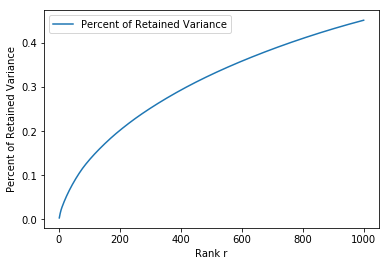

<class 'numpy.ndarray'>
(37249, 2)


In [27]:
ratios = np.array([])
sum = 0
for ratio in svd.explained_variance_ratio_:
    sum = sum + ratio
    ratios = np.append(ratios, sum)
print(ratios[0:10])
xaxis = np.array(range(1,rank+1))
yaxis = [[ratios,'Percent of Retained Variance']]
xlabel = 'Rank r'
ylabel = 'Percent of Retained Variance'
make_plot(xaxis, yaxis, xlabel, ylabel)
print(type(svd_X))
print(svd_X[:,:2].shape)

In [30]:
from sklearn.metrics import (confusion_matrix, homogeneity_score, completeness_score, 
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score)
def prob_3a_ii(method, XData=None):
    ranks = np.array([1,2,3,5,10,20,50,100,300])
    np_hg = np.array([])
    np_cp = np.array([])
    np_vm = np.array([])
    np_ari = np.array([])
    np_ami = np.array([])
    class_names = ['Negative', 'Neutral', 'Positive']

    for r in ranks:
        if method == 'NMF':
            nmf = NMF(n_components=r, max_iter=(50 if r==300 else 200))
            data = nmf.fit_transform(X_tfidf)
        else:
            data = XData[:,:r]
        km = KMeans(n_clusters=3, max_iter=100, n_init=40)
        km.fit(data)
        Y_pred = km.predict(data)

        title = str(method)+' Rank '+str(r)
        cm = contingency_matrix(y, Y_pred, eps=None, sparse=False)
        plot_contingency_matrix(cm = cm,
                       normalize    = False,
                       target_names = ['Negative','Neutral','Positive'],title = str(method)+' Rank '+str(r))
       
        hg, cp, vm, ari, ami = plot_measures(y, Y_pred)
        
        np_hg = np.append(np_hg, hg)
        np_cp = np.append(np_cp, cp)
        np_vm = np.append(np_vm, vm)
        np_ari = np.append(np_ari, ari)
        np_ami = np.append(np_ami, ami)

    xaxis = ranks
    yaxis = [[np_hg, 'Homogeneity'],[np_cp, 'Completeness'], [np_vm, 'V_measure'],[np_ari, 'Adjusted Rand Index'], [np_ami, 'Adjusted Mutual Info']]
    xlabel = 'Rank r'
    ylabel = 'Score'
    title = str(method)+' Score'
    make_plot(xaxis, yaxis, xlabel, ylabel, title=title)
    make_plot(xaxis, yaxis, xlabel, ylabel, xlim = (0,10), title=title)
    return np_hg, np_cp, np_vm, np_ari, np_ami

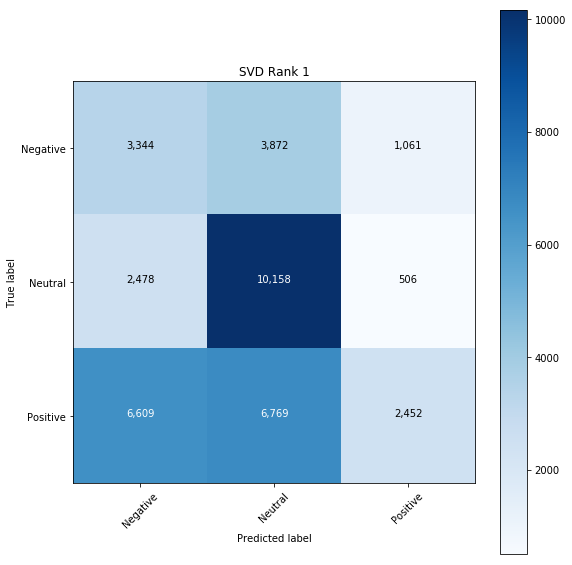

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0520
Completeness: 0.0595
V-measure: 0.0555
Adjusted Rand-Index: 0.0556
Adjusted Mutual Info: 0.0520


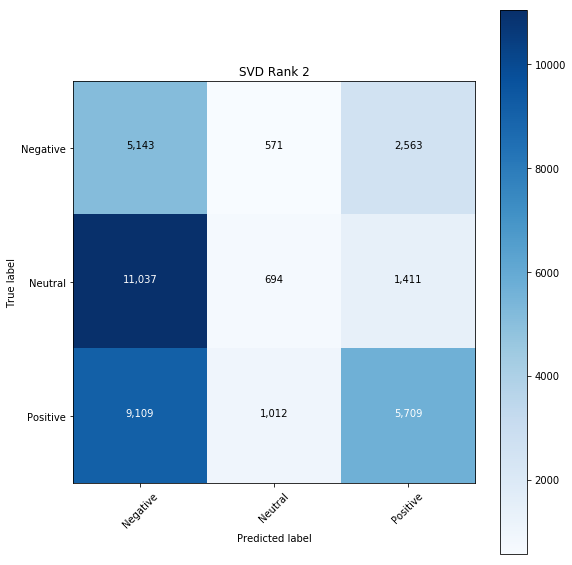

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0370
Completeness: 0.0503
V-measure: 0.0426
Adjusted Rand-Index: 0.0352
Adjusted Mutual Info: 0.0369


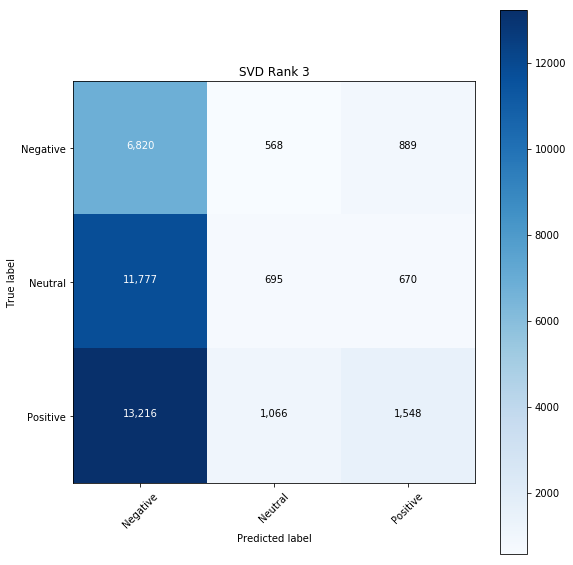

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0045
Completeness: 0.0093
V-measure: 0.0060
Adjusted Rand-Index: 0.0034
Adjusted Mutual Info: 0.0044


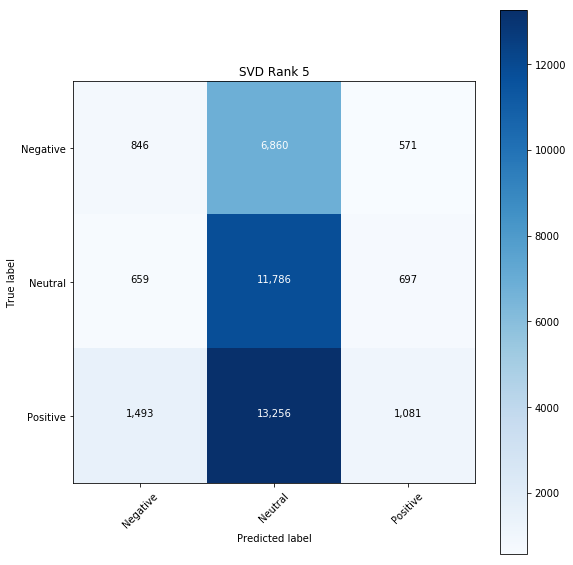

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0041
Completeness: 0.0086
V-measure: 0.0056
Adjusted Rand-Index: 0.0029
Adjusted Mutual Info: 0.0041


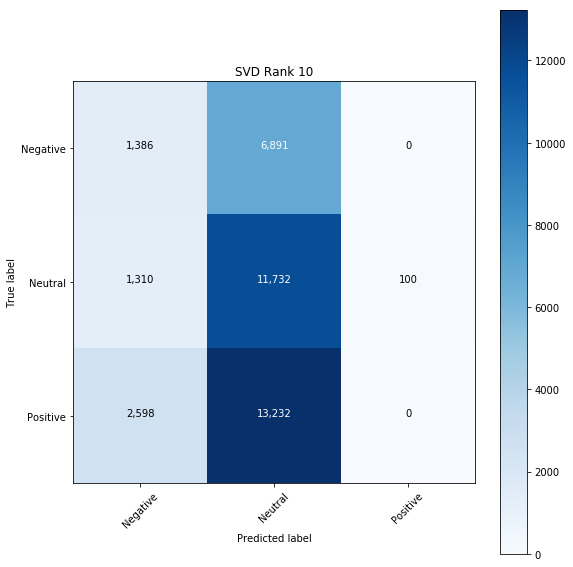

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0065
Completeness: 0.0162
V-measure: 0.0093
Adjusted Rand-Index: 0.0025
Adjusted Mutual Info: 0.0064


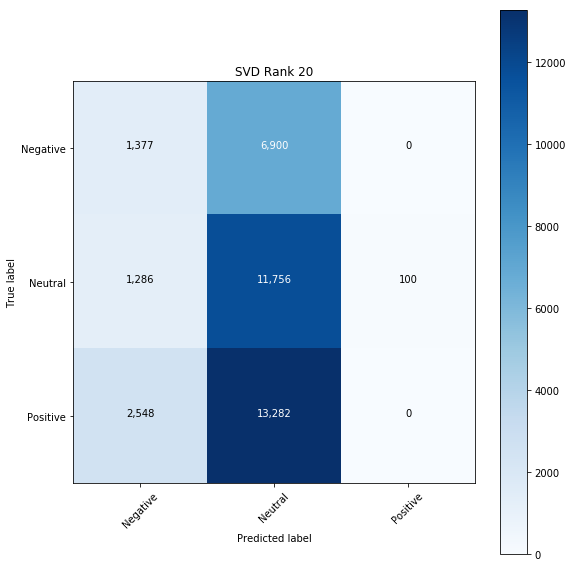

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0065
Completeness: 0.0163
V-measure: 0.0093
Adjusted Rand-Index: 0.0027
Adjusted Mutual Info: 0.0064


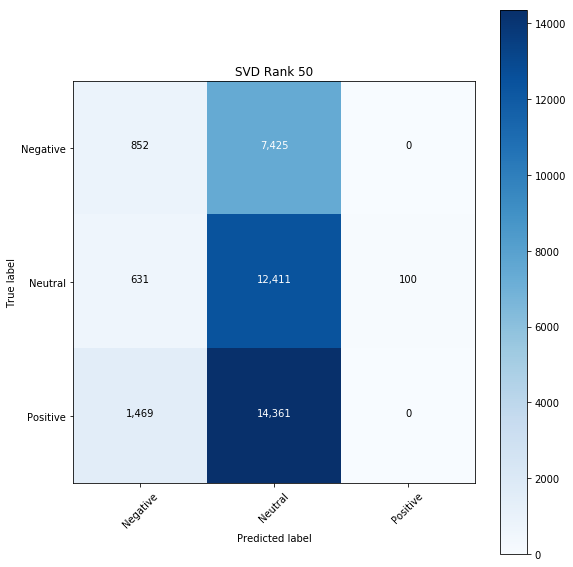

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0063
Completeness: 0.0228
V-measure: 0.0099
Adjusted Rand-Index: 0.0026
Adjusted Mutual Info: 0.0063


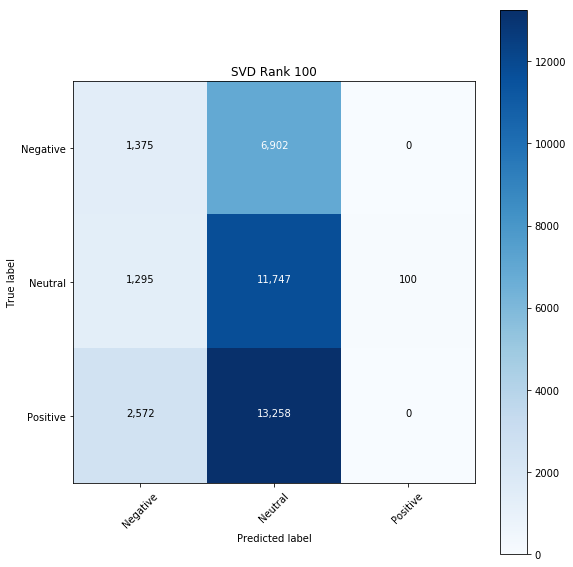

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0065
Completeness: 0.0162
V-measure: 0.0093
Adjusted Rand-Index: 0.0025
Adjusted Mutual Info: 0.0064


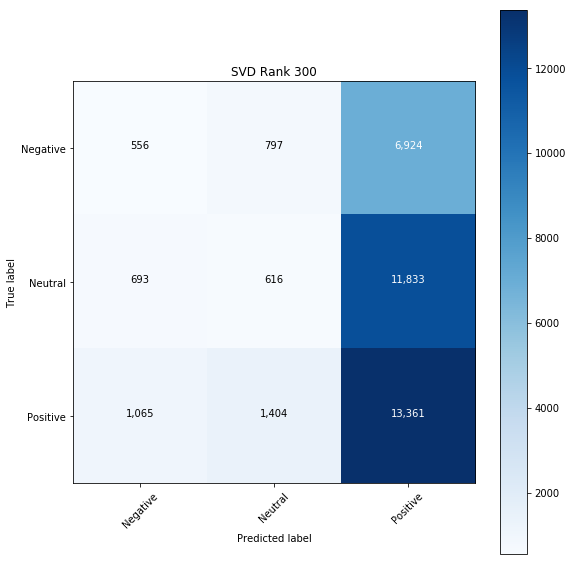

Homogeneity: 0.0039
Completeness: 0.0083
V-measure: 0.0053
Adjusted Rand-Index: 0.0026
Adjusted Mutual Info: 0.0038


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


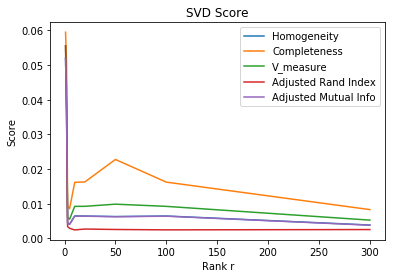

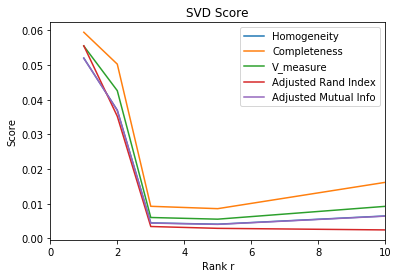

In [31]:
hg, cp, vm, ari, ami = prob_3a_ii('SVD', svd_X)

In [32]:
print(hg)
print(cp)
print(vm)
print(ari)
print(ami)

[0.05200869 0.03698877 0.00448304 0.00411094 0.00648141 0.00647102
 0.00631267 0.00646974 0.00387041]
[0.05946514 0.05026925 0.00927023 0.00859185 0.01617391 0.01630145
 0.02277746 0.01624039 0.00831954]
[0.05548753 0.04261838 0.00604348 0.00556108 0.00925431 0.00926444
 0.0098856  0.00925323 0.00528305]
[0.05555931 0.03523558 0.00344417 0.0029148  0.00246127 0.00271184
 0.00258598 0.0024783  0.00256624]
[0.05196091 0.03694023 0.00443286 0.00406074 0.00643115 0.00642076
 0.0062624  0.00641948 0.00382019]


## the best r for svd is r=1

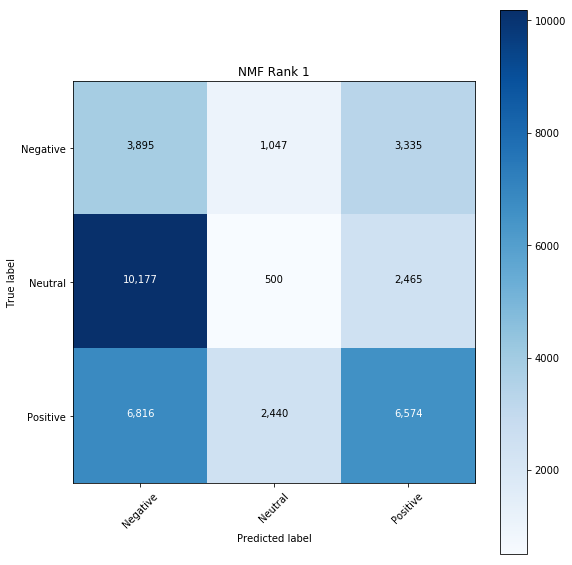

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0517
Completeness: 0.0592
V-measure: 0.0552
Adjusted Rand-Index: 0.0549
Adjusted Mutual Info: 0.0516


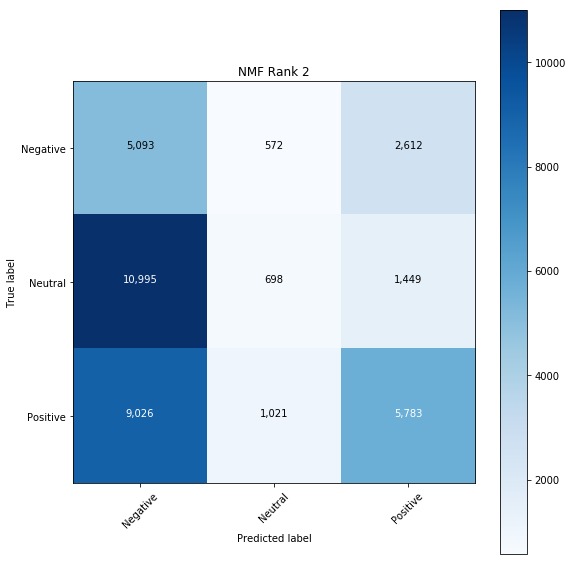

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0372
Completeness: 0.0502
V-measure: 0.0428
Adjusted Rand-Index: 0.0361
Adjusted Mutual Info: 0.0372


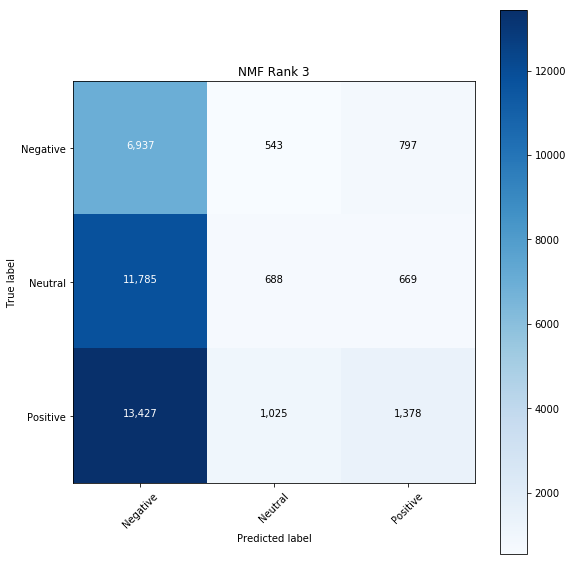

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0030
Completeness: 0.0065
V-measure: 0.0041
Adjusted Rand-Index: 0.0027
Adjusted Mutual Info: 0.0030


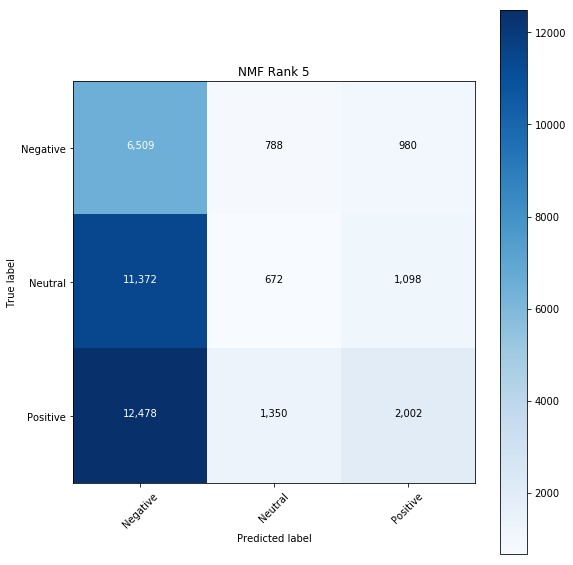

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0047
Completeness: 0.0083
V-measure: 0.0060
Adjusted Rand-Index: 0.0028
Adjusted Mutual Info: 0.0046


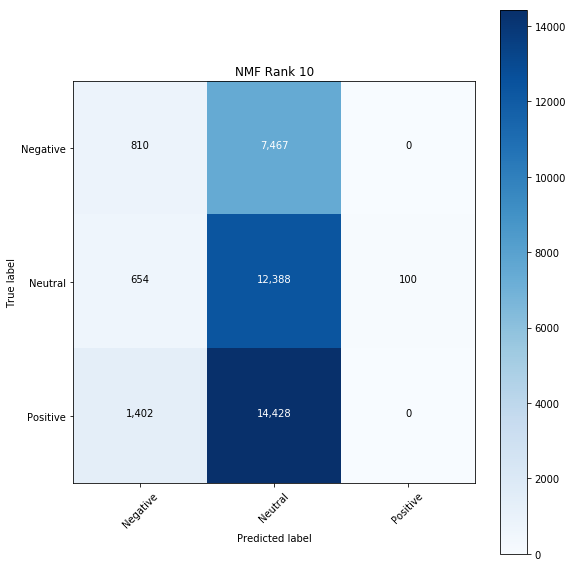

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0055
Completeness: 0.0201
V-measure: 0.0086
Adjusted Rand-Index: 0.0022
Adjusted Mutual Info: 0.0054


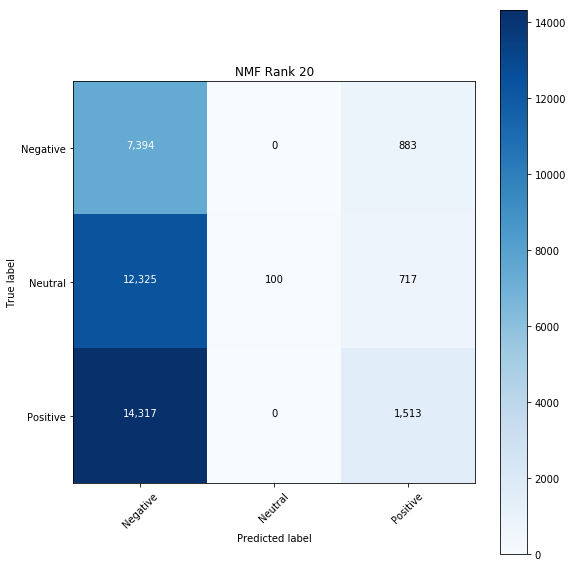

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0056
Completeness: 0.0197
V-measure: 0.0088
Adjusted Rand-Index: 0.0026
Adjusted Mutual Info: 0.0056


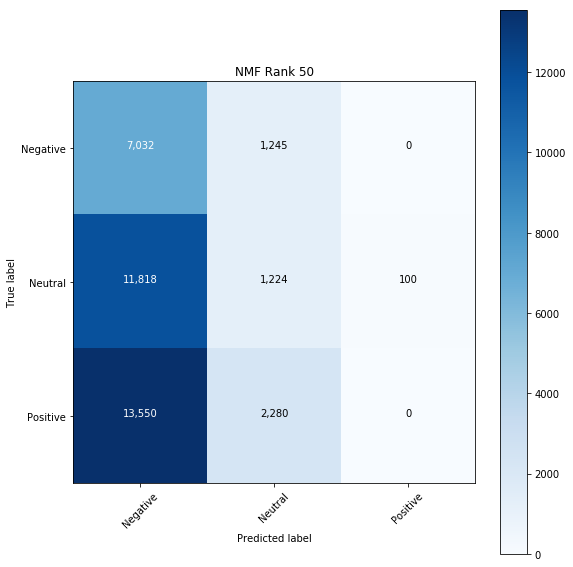

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0054
Completeness: 0.0144
V-measure: 0.0078
Adjusted Rand-Index: 0.0022
Adjusted Mutual Info: 0.0053


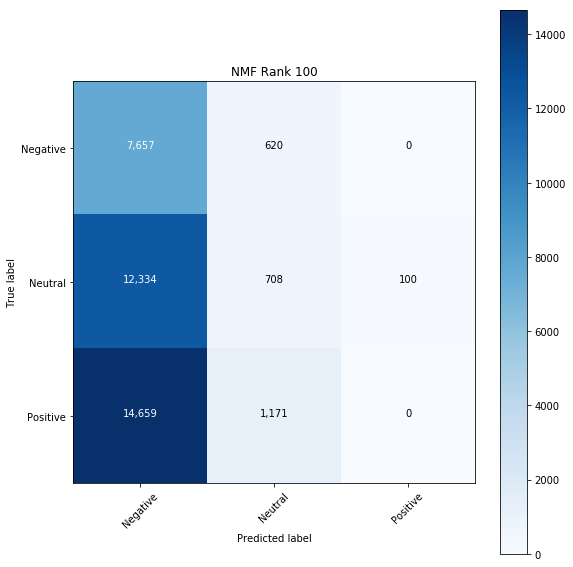

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0033
Completeness: 0.0134
V-measure: 0.0053
Adjusted Rand-Index: 0.0003
Adjusted Mutual Info: 0.0033


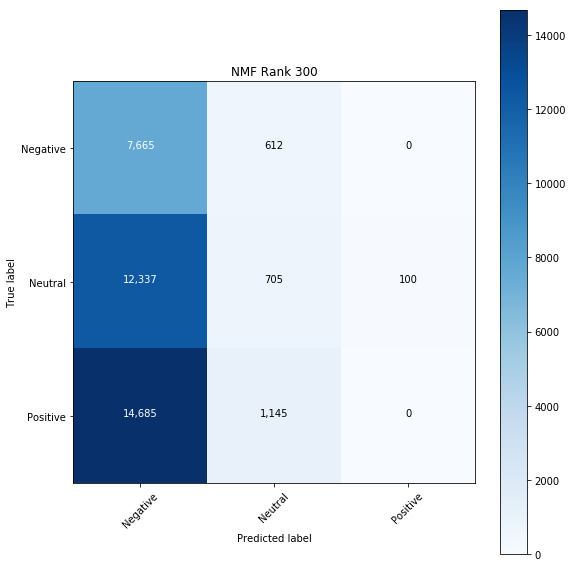

Homogeneity: 0.0033
Completeness: 0.0133
V-measure: 0.0052
Adjusted Rand-Index: 0.0004
Adjusted Mutual Info: 0.0032


C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


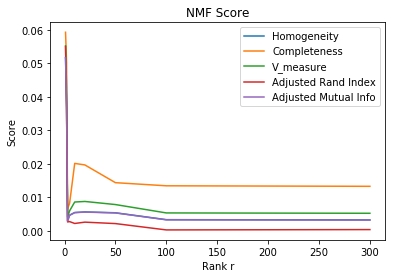

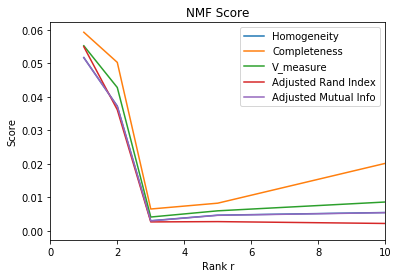

In [33]:
from sklearn.decomposition import NMF
hg, cp, vm, ari, ami = prob_3a_ii('NMF')

# Question 7:
    Visualize the clustering results for:

    SVD with its best r=1

    NMF with its best r=1

In [54]:
svd = TruncatedSVD(n_components=2)
svd_r2 = svd.fit_transform(X_tfidf)
nmf = NMF(n_components=2, max_iter=(200))
nmf_r2 = nmf.fit_transform(X_tfidf)

In [62]:
def log_transform(data):
    c = 0.01
    data = np.array(data)
    data_shape = data.shape
    new_data = np.copy(data)
    for i in range(data_shape[0]):
        num1 = data[i,0]
        num2 = data[i,1]
        new_data[i,0] = np.sign(num1)*(np.log10(abs(num1)+c)-np.log10(c))
        new_data[i,1] = np.sign(num2)*(np.log10(abs(num2)+c)-np.log10(c))
    return new_data

def visualize(X_train, Y_train, dim_reduction_mode, r, title, scale=None, log=None):
    if dim_reduction_mode=='SVD':
        svd = TruncatedSVD(n_components=r)
        x_reduction = svd.fit_transform(X_train)
    elif dim_reduction_mode == 'NMF':
        nmf = NMF(n_components=r, max_iter=(50 if r==300 else 200))
        x_reduction = nmf.fit_transform(X_train)
        
    # perform scale and log operation
    if scale!=None:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        x_reduction = scaler.fit_transform(x_reduction)
    if log != None:
        x_reduction = log_transform(x_reduction)

    # perform K-means on the data
    km = KMeans(n_clusters=3, max_iter=100, n_init=40)
    km.fit(x_reduction)
    y_pred = km.predict(x_reduction)
    
    # plot the meaures of the result
    plot_measures(Y_train, y_pred)
    
    # visualize the result
    plt.figure(figsize=(10, 10))
    plt.subplot(121)
    plt.scatter(x_reduction[:, 0], x_reduction[:, 1],c=y_pred)
    plt.title("Predicted cluster ("+ str(title)+")")

    plt.subplot(122)
    plt.scatter(x_reduction[:, 0], x_reduction[:, 1],c=Y_train)
    plt.title("Ground truth cluster ("+ str(title)+")")
    plt.savefig(title + ".png")

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0369
Completeness: 0.0502
V-measure: 0.0425
Adjusted Rand-Index: 0.0352
Adjusted Mutual Info: 0.0368


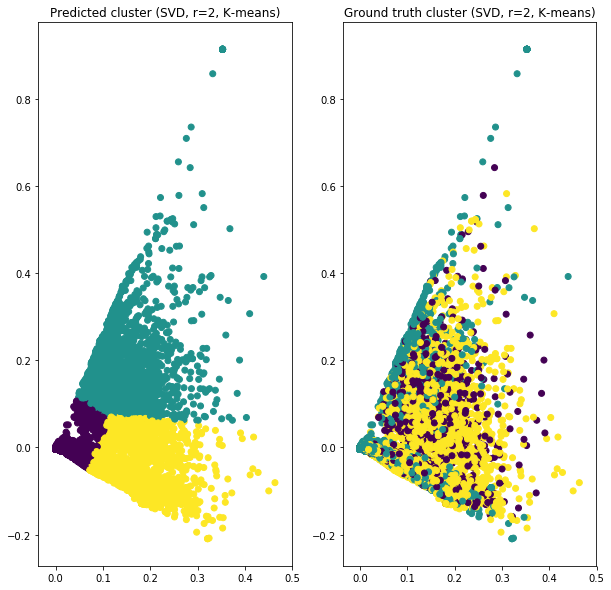

In [61]:
visualize(X_tfidf, y,dim_reduction_mode='SVD', r=2, title='SVD, r=2, K-means')

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0373
Completeness: 0.0507
V-measure: 0.0430
Adjusted Rand-Index: 0.0358
Adjusted Mutual Info: 0.0373


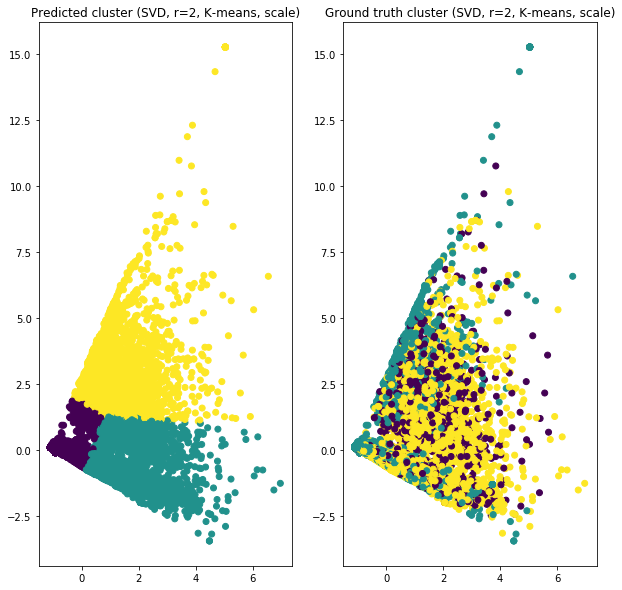

In [68]:
visualize(X_tfidf, y,dim_reduction_mode='SVD', r=2, title='SVD, r=2, K-means, scale', scale=1)

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0372
Completeness: 0.0502
V-measure: 0.0427
Adjusted Rand-Index: 0.0361
Adjusted Mutual Info: 0.0371


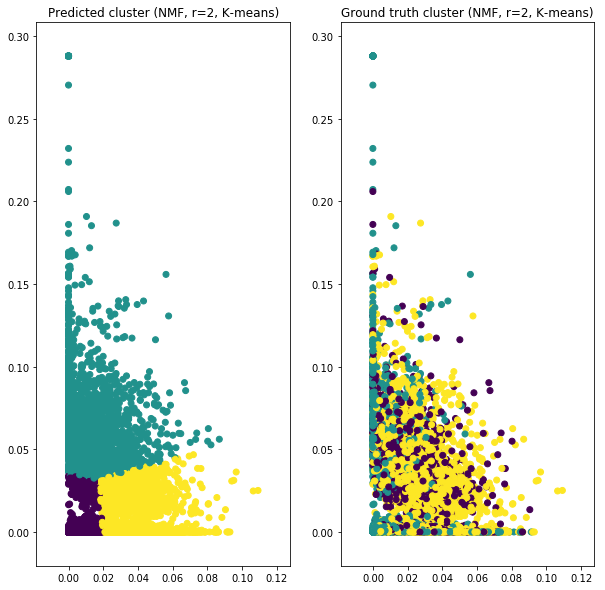

In [64]:
visualize(X_tfidf, y,dim_reduction_mode='NMF', r=2, title='NMF, r=2, K-means')

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0372
Completeness: 0.0506
V-measure: 0.0429
Adjusted Rand-Index: 0.0359
Adjusted Mutual Info: 0.0371


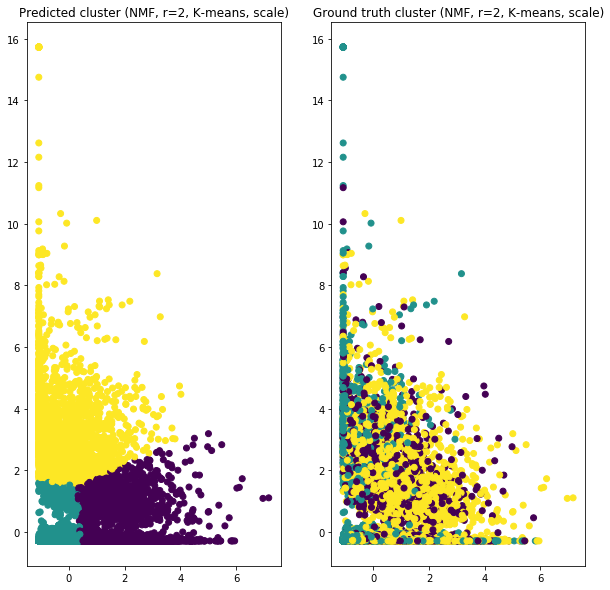

In [65]:
visualize(X_tfidf, y,dim_reduction_mode='NMF', r=2, title='NMF, r=2, K-means, scale', scale=1)

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0593
Completeness: 0.0683
V-measure: 0.0635
Adjusted Rand-Index: 0.0808
Adjusted Mutual Info: 0.0593


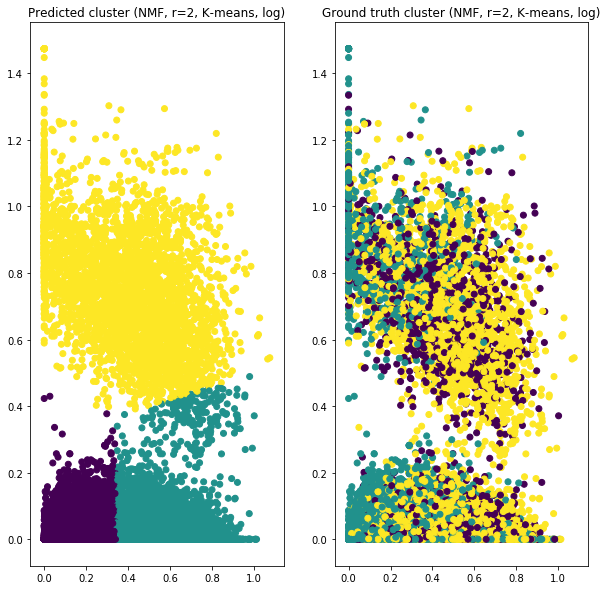

In [66]:
visualize(X_tfidf, y,dim_reduction_mode='NMF', r=2, title='NMF, r=2, K-means, log', log=1)

C:\Users\SANDS\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Homogeneity: 0.0498
Completeness: 0.0580
V-measure: 0.0536
Adjusted Rand-Index: 0.0622
Adjusted Mutual Info: 0.0498


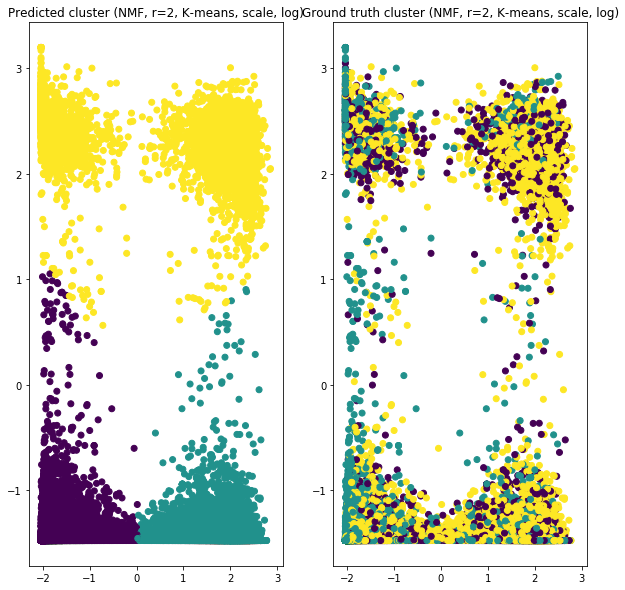

In [67]:
visualize(X_tfidf, y,dim_reduction_mode='NMF', r=2, title='NMF, r=2, K-means, scale, log', scale=1, log=1)